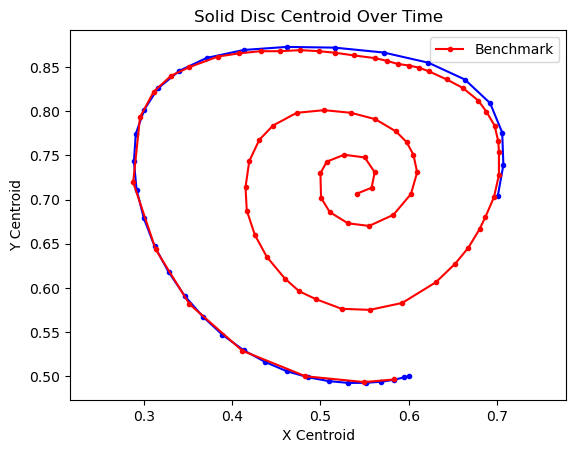

In [6]:
# loop through the files in frames directory and pull the level set (phi) from each and find the centroid of the level set zero and plot (x,y) in order of files which is data_number.h5
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

def get_centroid(phi, X, Y):
    """Compute the centroid of the region phi <= 0."""
    mask = (phi <= 0)
    if not mask.any():
        return None
    # Select the physical coordinates of all solid cells
    Xs = X[mask]
    Ys = Y[mask]
    return Xs.mean(), Ys.mean()

def get_area(phi):
    """Compute the area of the region phi <= 0."""
    mask = (phi <= 0)
    return np.sum(mask)  # Count the number of cells where phi <= 0

def main():
    frames_dir = 'frames'
    # Assume all your phi fields have the same shape:
    sample = h5py.File(os.path.join(frames_dir, sorted(os.listdir(frames_dir))[0]), 'r')
    phi0 = sample['phi'][:]
    sample.close()

    Nx, Ny = phi0.shape
    x = np.linspace(0, 1, Ny)
    y = np.linspace(0, 1, Nx)
    X, Y = np.meshgrid(x, y)

    centroids = []
    for filename in sorted(os.listdir(frames_dir)):
        if not filename.endswith('.h5'):
            continue
        with h5py.File(os.path.join(frames_dir, filename), 'r') as f:
            phi = f['phi'][:]
        c = get_centroid(phi, X, Y)
        if c is not None:
            centroids.append(c)

    centroids = np.array(centroids)
    # Plot every 5th centroid to reduce point frequency
    x = centroids[::20, 0]
    y = centroids[::20, 1]
    
    plt.plot(x, y, 'o-', markersize=3, color='blue')
    
    # open csv file to get benchmark data
    benchmark_file = 'Seg_1024x1024.csv'
    if os.path.exists(benchmark_file):
        benchmark_data = np.loadtxt(benchmark_file, delimiter=',', skiprows=1)
        plt.plot(benchmark_data[:, 0], benchmark_data[:, 1], 'o-', markersize=3, color='red', label='Benchmark')
        plt.legend()
    
    plt.xlabel('X Centroid')
    plt.ylabel('Y Centroid')
    plt.title('Solid Disc Centroid Over Time')
    # plt.grid()
    plt.axis('equal')
    plt.show()

if __name__ == '__main__':
    main()

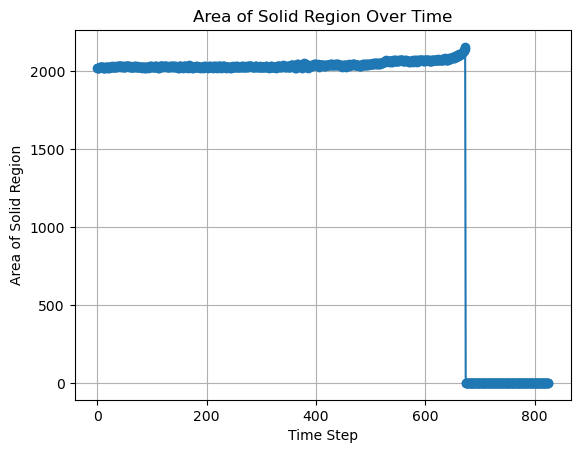

In [7]:
# plot area over time
def plot_area_over_time(frames_dir):
    areas = []
    for filename in sorted(os.listdir(frames_dir)):
        if not filename.endswith('.h5'):
            continue
        with h5py.File(os.path.join(frames_dir, filename), 'r') as f:
            phi = f['phi'][:]
        area = get_area(phi)
        areas.append(area)

    plt.figure()
    plt.plot(areas, marker='o')
    plt.xlabel('Time Step')
    plt.ylabel('Area of Solid Region')
    plt.title('Area of Solid Region Over Time')
    plt.grid()
    plt.show()
if __name__ == '__main__':
    frames_dir = 'frames'
    plot_area_over_time(frames_dir)